# Swimming Pool Detection Workflow Testing

In [1]:
# Notebook Configuration

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
from ds_code_challenge.data.image_loader import load_swimming_pool_dataset
from ds_code_challenge.config import Config

import sys
import logging
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch

2025-10-20 10:38:52.832 | INFO     | ds_code_challenge.config:Config:26 - PROJ_ROOT path is: /Users/wiebke/PycharmProjects/ds_code_challenge


## Load Data

In [3]:
data_dir = Config.DATA_DIR / 'raw' / 'images' / 'swimming-pool'

train_loader, test_loader, class_names = load_swimming_pool_dataset(
    data_dir=data_dir,
    image_size=224,
    batch_size=32,
    test_size=0.2,
    random_state=42
)

INFO:ds_code_challenge.data.image_loader:Loading dataset from /Users/wiebke/PycharmProjects/ds_code_challenge/data/raw/images/swimming-pool
INFO:ds_code_challenge.data.image_loader:Found 1000 images with pools (from directory)
INFO:ds_code_challenge.data.image_loader:Found 1000 images without pools (from directory)
INFO:ds_code_challenge.data.image_loader:Loaded 2000 images total
INFO:ds_code_challenge.data.image_loader:  With pool: 1000
INFO:ds_code_challenge.data.image_loader:  Without pool: 1000
INFO:ds_code_challenge.data.image_loader:Train set: 1600 images
INFO:ds_code_challenge.data.image_loader:Test set: 400 images


2025-10-20 10:38:57.553 | INFO     | ds_code_challenge.config:Config:26 - PROJ_ROOT path is: /Users/wiebke/PycharmProjects/ds_code_challenge
2025-10-20 10:38:57.553 | INFO     | ds_code_challenge.config:Config:26 - PROJ_ROOT path is: /Users/wiebke/PycharmProjects/ds_code_challenge


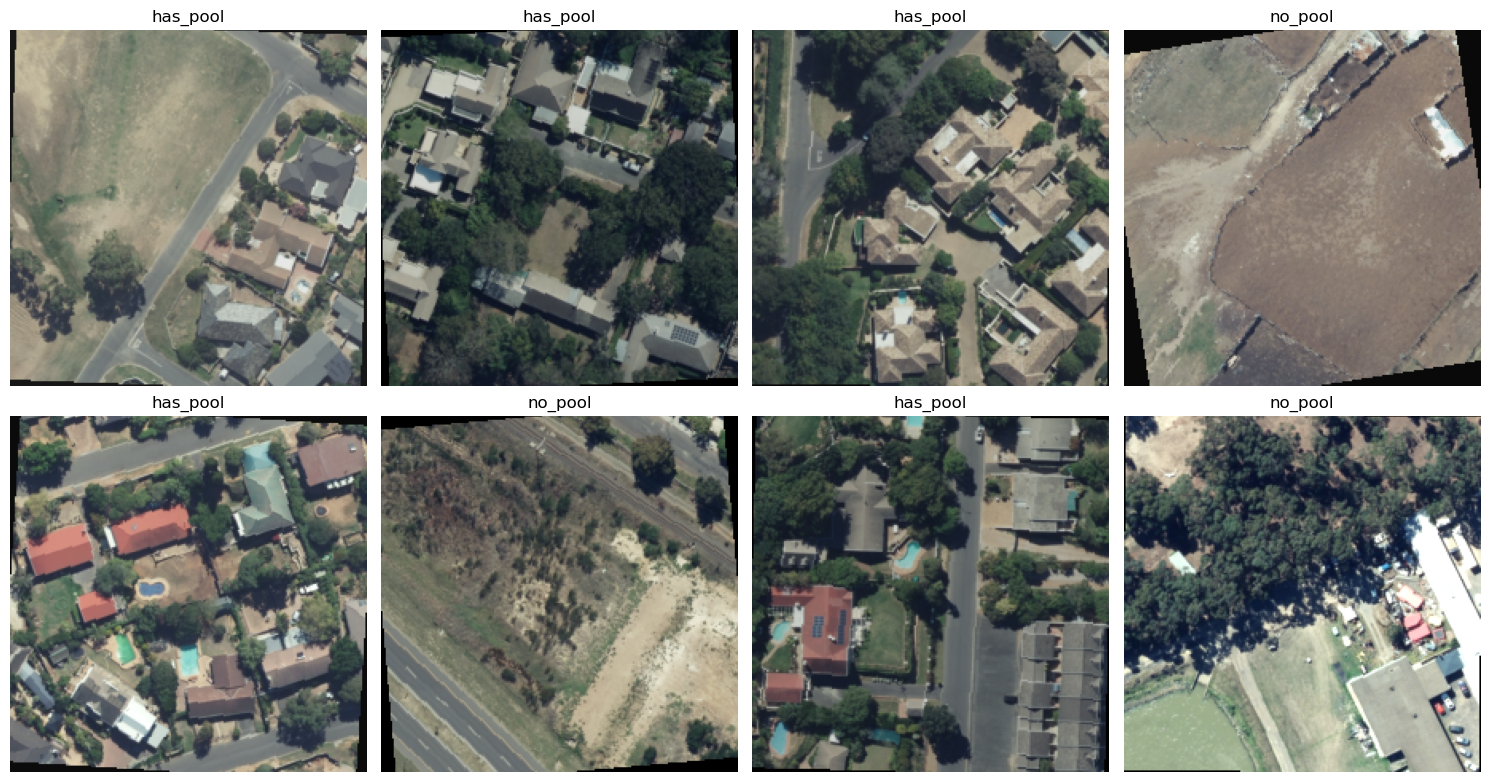

In [4]:
# Get a batch of training data
images, labels = next(iter(train_loader))

# Denormalize for visualization
def denormalize(tensor):
    """Denormalize image tensor for visualization."""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return tensor * std + mean

# Plot sample images
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i in range(8):
    img = denormalize(images[i])
    img = img.permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)
    
    axes[i].imshow(img)
    axes[i].set_title(f"{class_names[labels[i].item()]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()